In [17]:
setwd("~//praxiskurs_fss21/")
options(repr.plot.width=8, repr.plot.height=3,repr.plot.res = 300)


In [18]:
df_covid <- read.csv("data/RKI_COVID19.csv")

In [26]:
df_covid$Meldedatum <- as.Date(df_covid$Meldedatum)
dates <- seq(min(df_covid$Meldedatum)-3, max(df_covid$Meldedatum), by="day") 
df_complete  <- data.frame(dates = dates )
df_complete$cases_per_day <- sapply(dates, function(date) sum(df_covid$AnzahlFall[df_covid$Meldedatum == date])  )
df_complete$runmean_cases <- caTools::runmean(df_complete$cases_per_day, k=7, align="center")
df_complete$deaths_per_day <- sapply(dates, function(date) sum(df_covid$AnzahlTodesfall[df_covid$Meldedatum == date])  )
df_complete$runmean_deaths <- caTools::runmean(df_complete$deaths_per_day, k=7, align="center")
df_complete <- df_complete[dates<=max(df_covid$Meldedatum),]

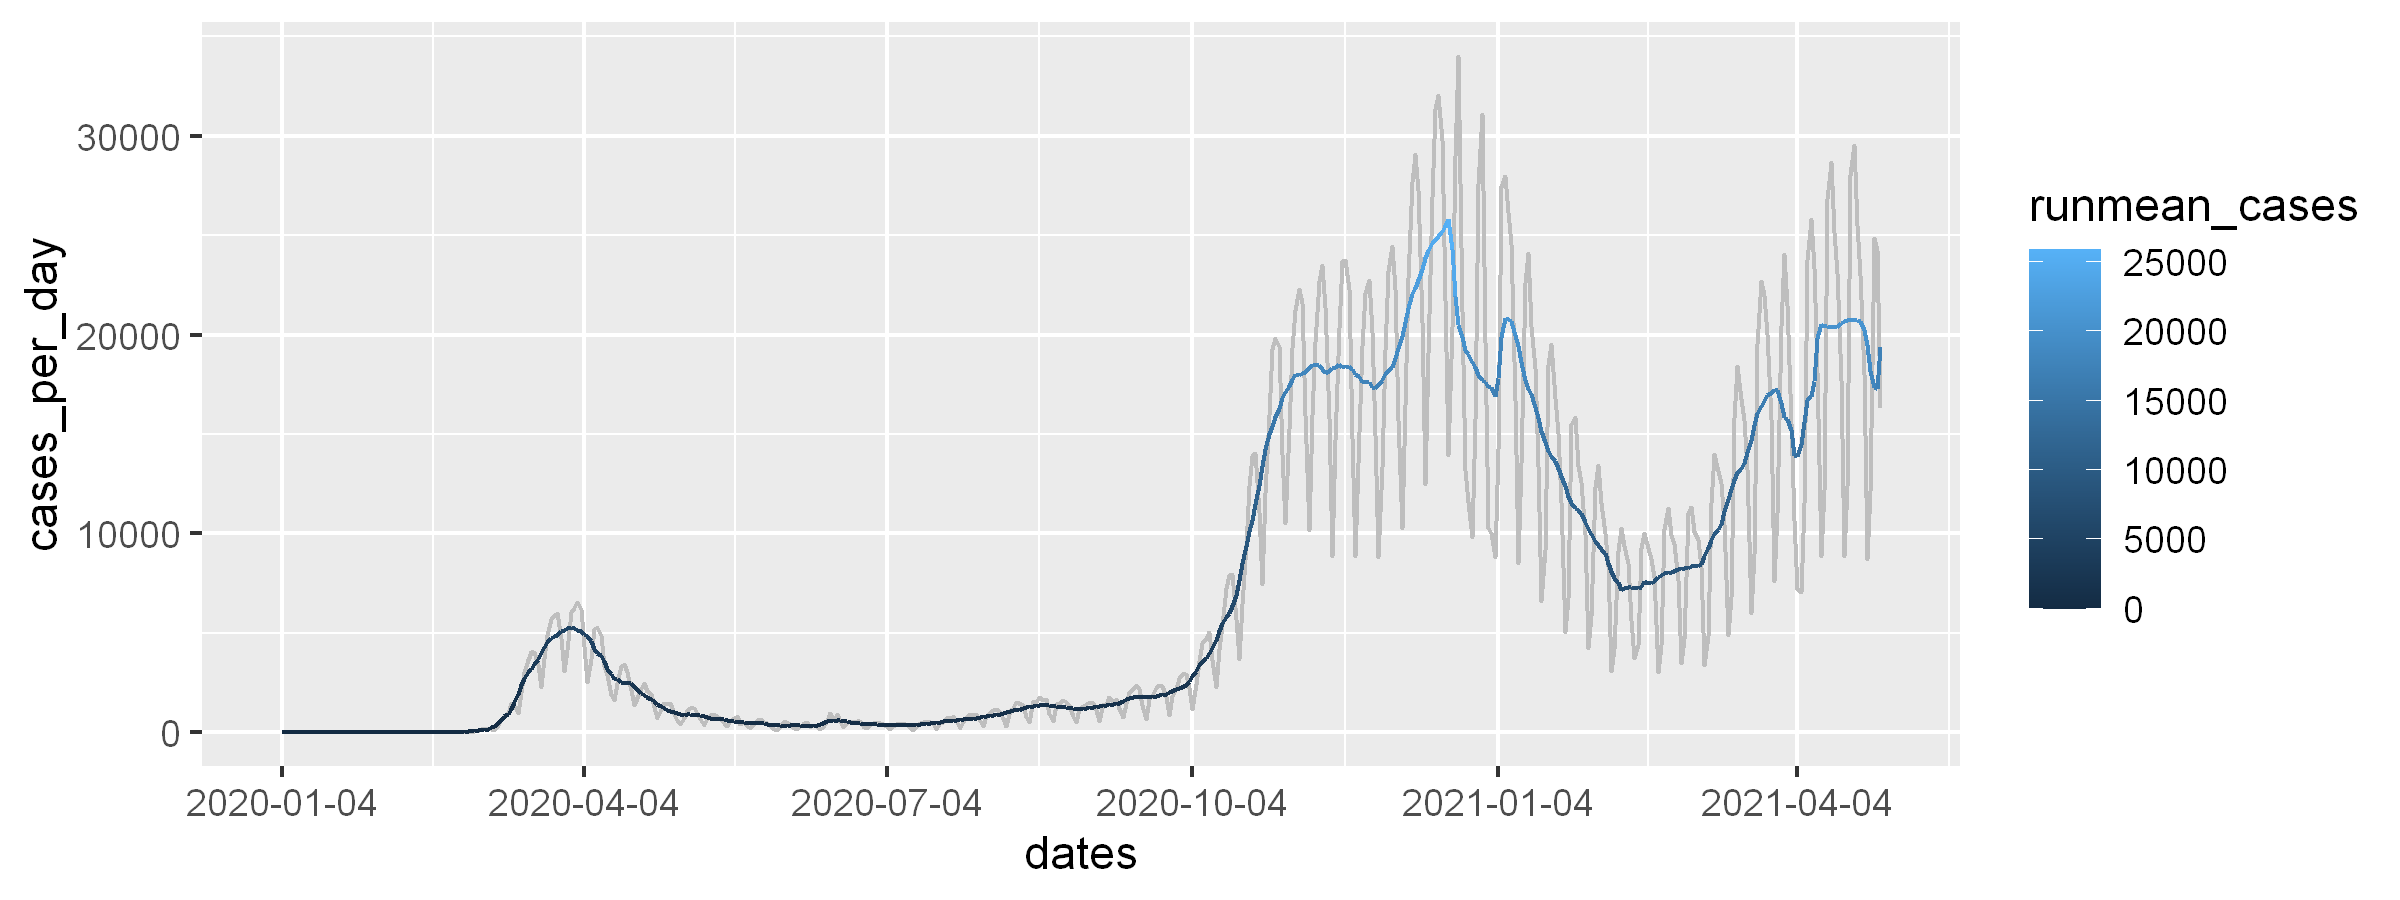

In [51]:
library(ggplot2)
p <- ggplot(df_complete) +
    geom_path(aes(x=dates, y=cases_per_day),color="grey") + 
    geom_path(aes(x=dates, y=runmean_cases, color= runmean_cases)) +
    scale_x_date(breaks=seq(min(dates),max(dates),by="3 months")) 
p

# Exponentielles Wachstum

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Removed 375 row(s) containing missing values (geom_path)."
Warning message:
"Removed 375 row(s) containing missing values (geom_path)."


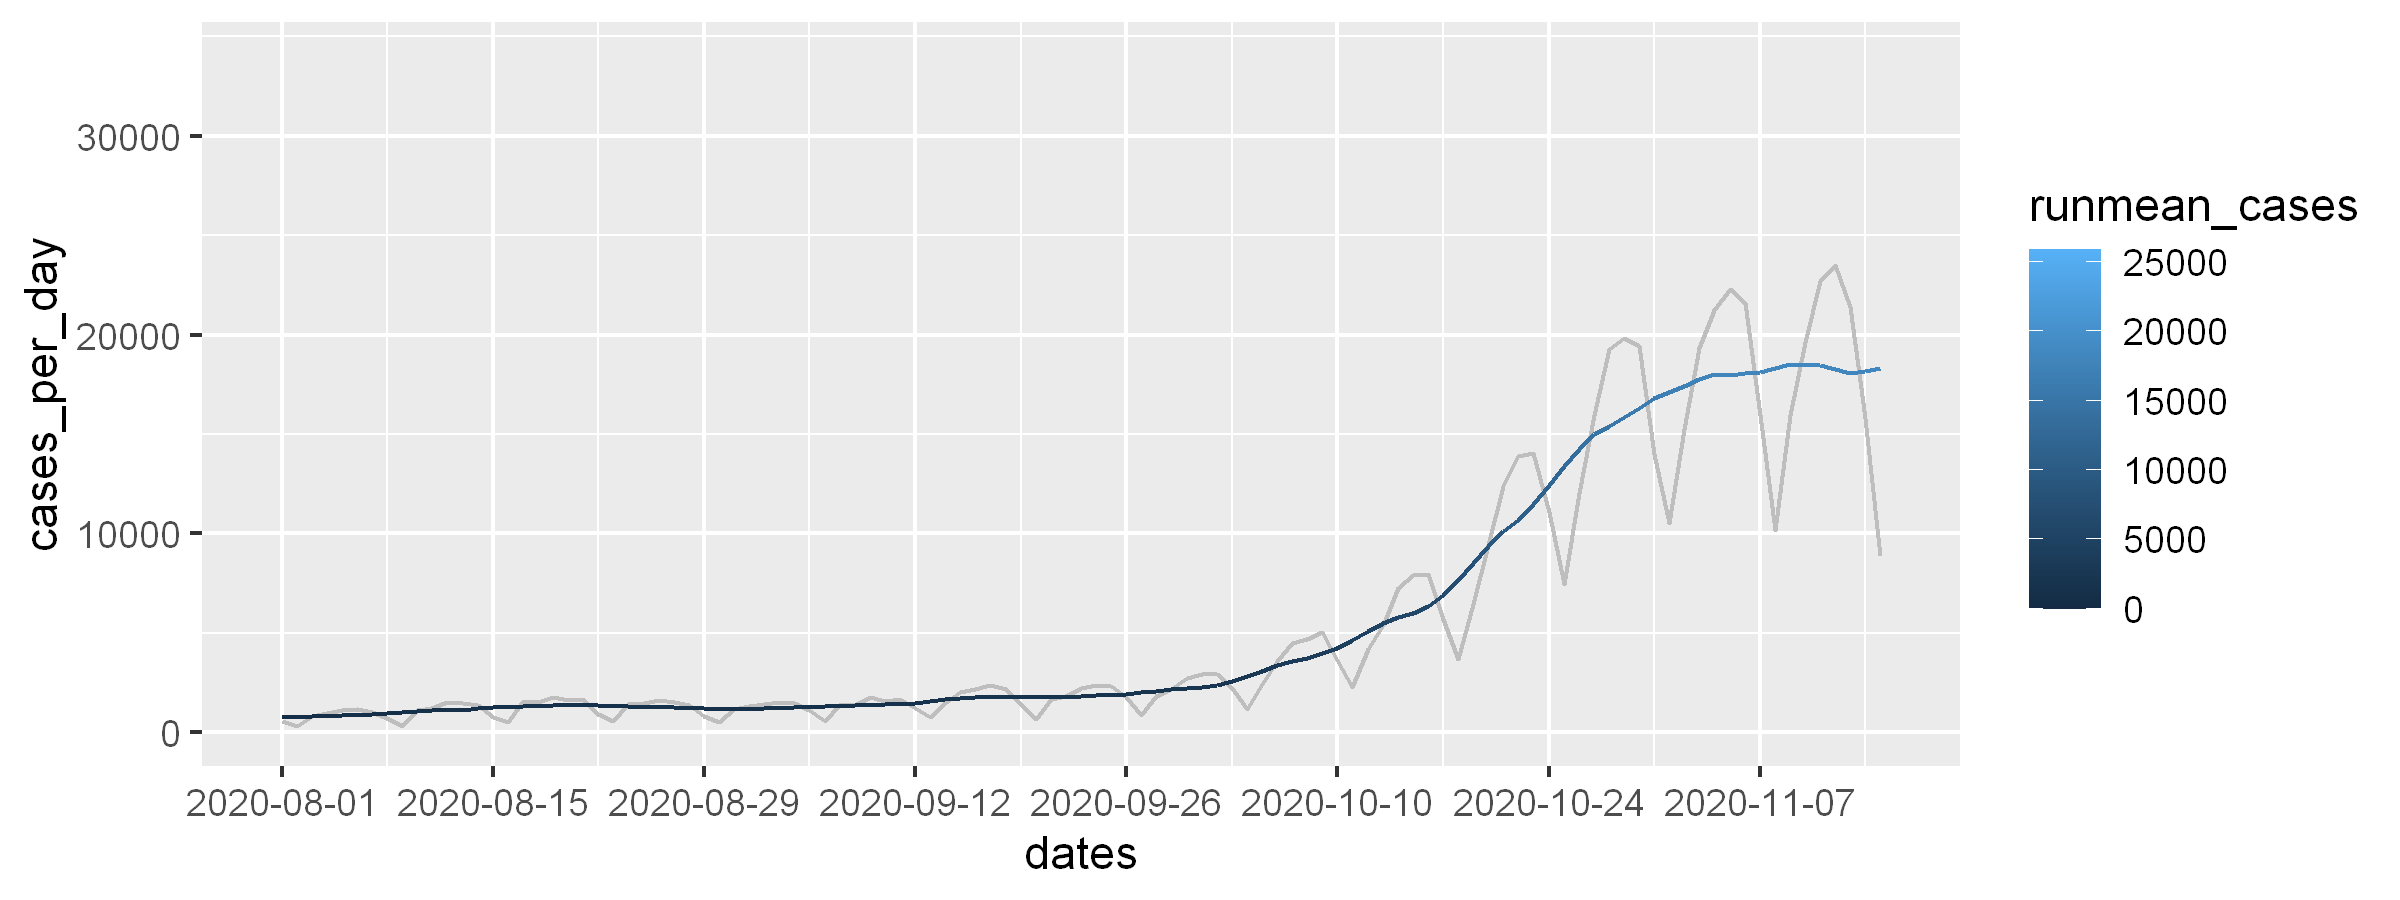

In [52]:
p + scale_x_date(breaks=seq(min(dates),max(dates),by="2 weeks"), 
                    limits=c(as.Date("2020-08-01"),as.Date("2020-11-15"))) 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 436 row(s) containing missing values (geom_path)."
Warning message:
"Removed 436 row(s) containing missing values (geom_path)."


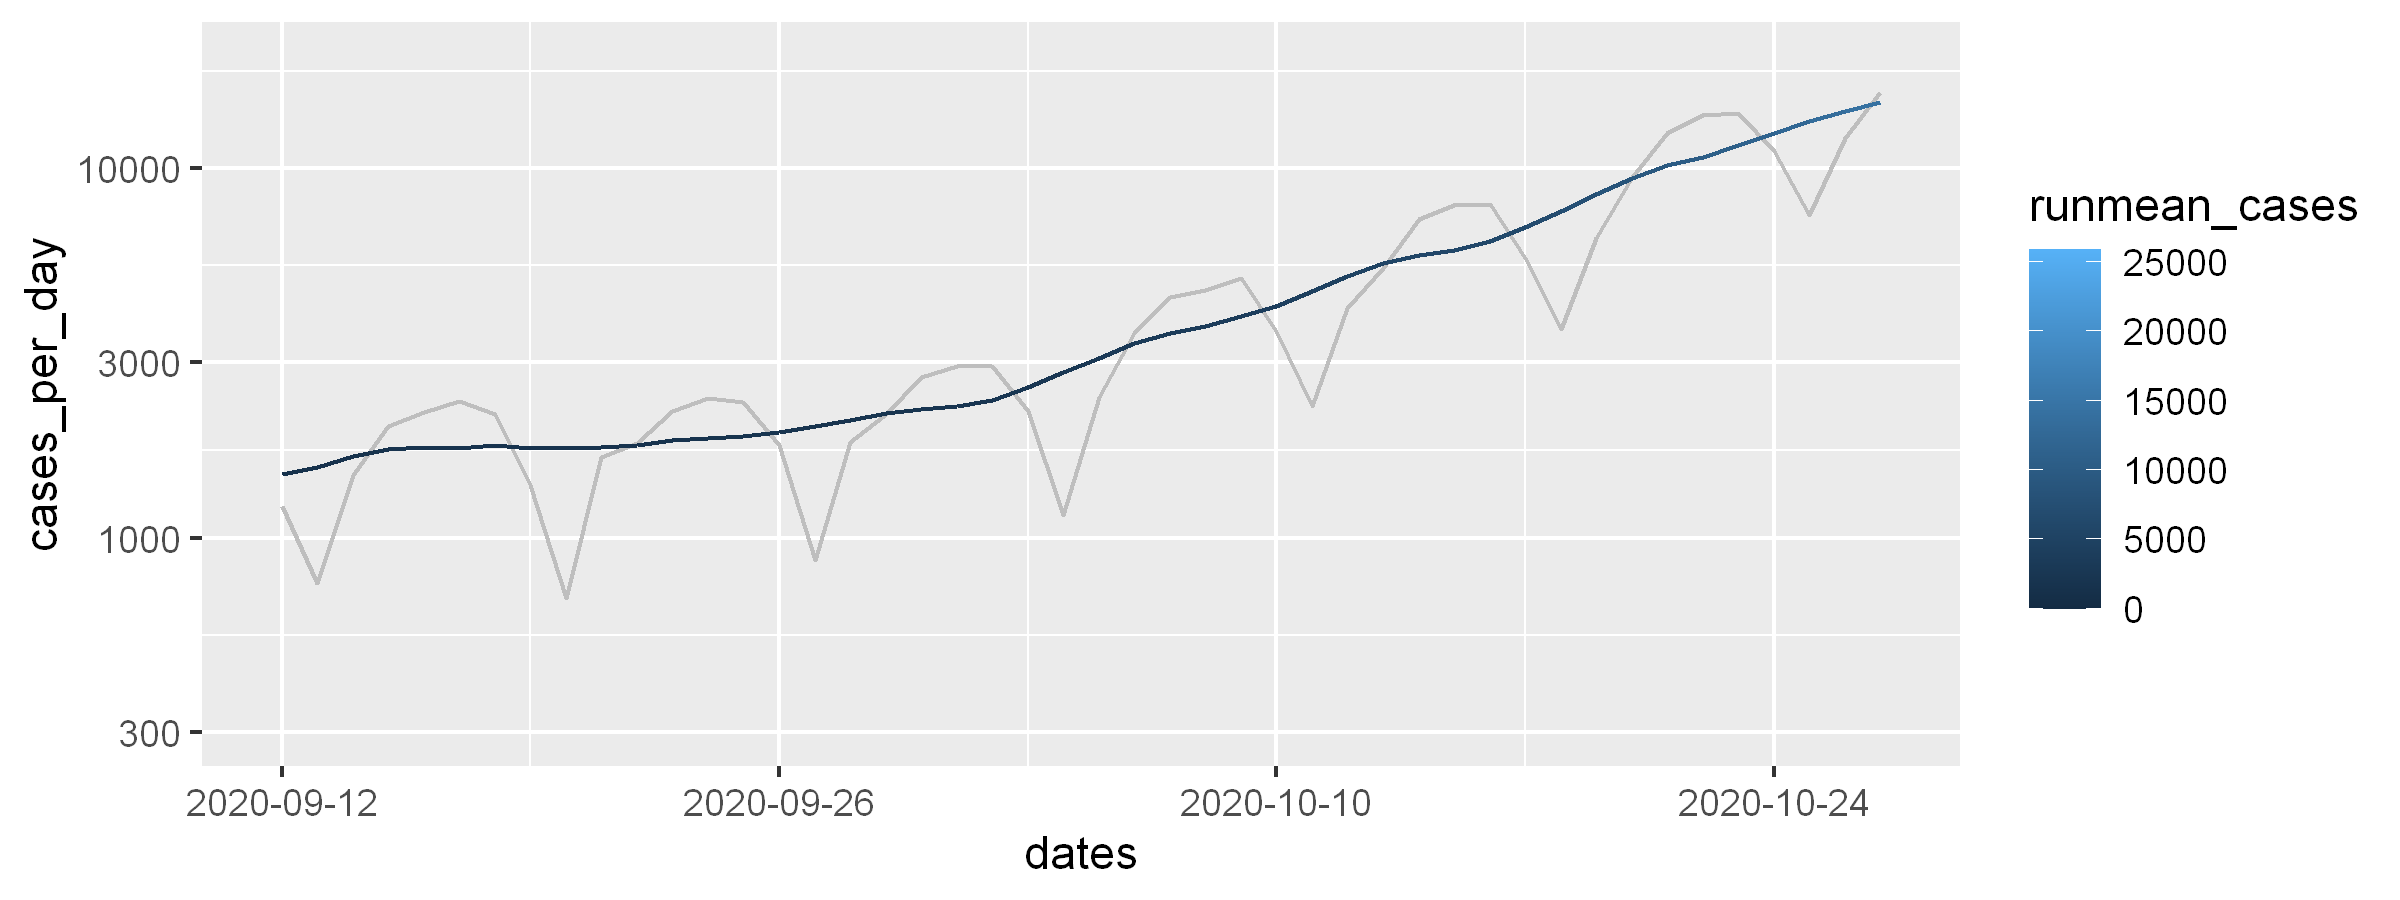

In [58]:
date_limits <- c(as.Date("2020-09-12"),as.Date("2020-10-27"))
q <- p + scale_x_date(breaks=seq(min(dates),max(dates),by="2 weeks"), limits= date_limits) +
    scale_y_log10(limits=c(300,20000))
q

Angenommen, wir haben im obigen Zeitraum ein exponentielles Wachstum, dann sollte für $a,b>0$ gelten
\\[ y \approx e^{a t + b}\\]
für die Zeitvariable $t$. Wir versuchen nun den Intercept $b$ und den Slope $a$ zu schätzen. Dafür beobachten wir zunächst
\\[ \log(y) = at+b.\\]
Für einen Vektor $(z_1,...,z_n)^T=\log(y)$ ist eine mögliche Schätzung also
\\[ a=z_1, \quad b=(z_n-z_1)/n.\\]

In [89]:
y_diff <- log(df_complete$runmean_cases[df_complete$dates %in% date_limits])
intercept  <- y_diff[1]
y_diff <- y_diff[2]-y_diff[1]
x_diff <- (date_limits[2]-date_limits[1])

In [90]:
intercept

[1] 7.309881

In [91]:
x_diff

Time difference of 45 days

In [87]:
slope <- y_diff/as.numeric(x_diff)
slope

[1] 0.05126158

In [93]:
line <-exp(intercept + (0:45) * slope)
df_line <- data.frame(dates= seq(date_limits[1],date_limits[2], by = "1 day"),line=line)
head(df_line)

,dates,line
,<date>,<dbl>
1,2020-09-12,1495.000
2,2020-09-13,1573.634
3,2020-09-14,1656.405
4,2020-09-15,1743.529
5,2020-09-16,1835.235
6,2020-09-17,1931.765


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 436 row(s) containing missing values (geom_path)."
Warning message:
"Removed 436 row(s) containing missing values (geom_path)."


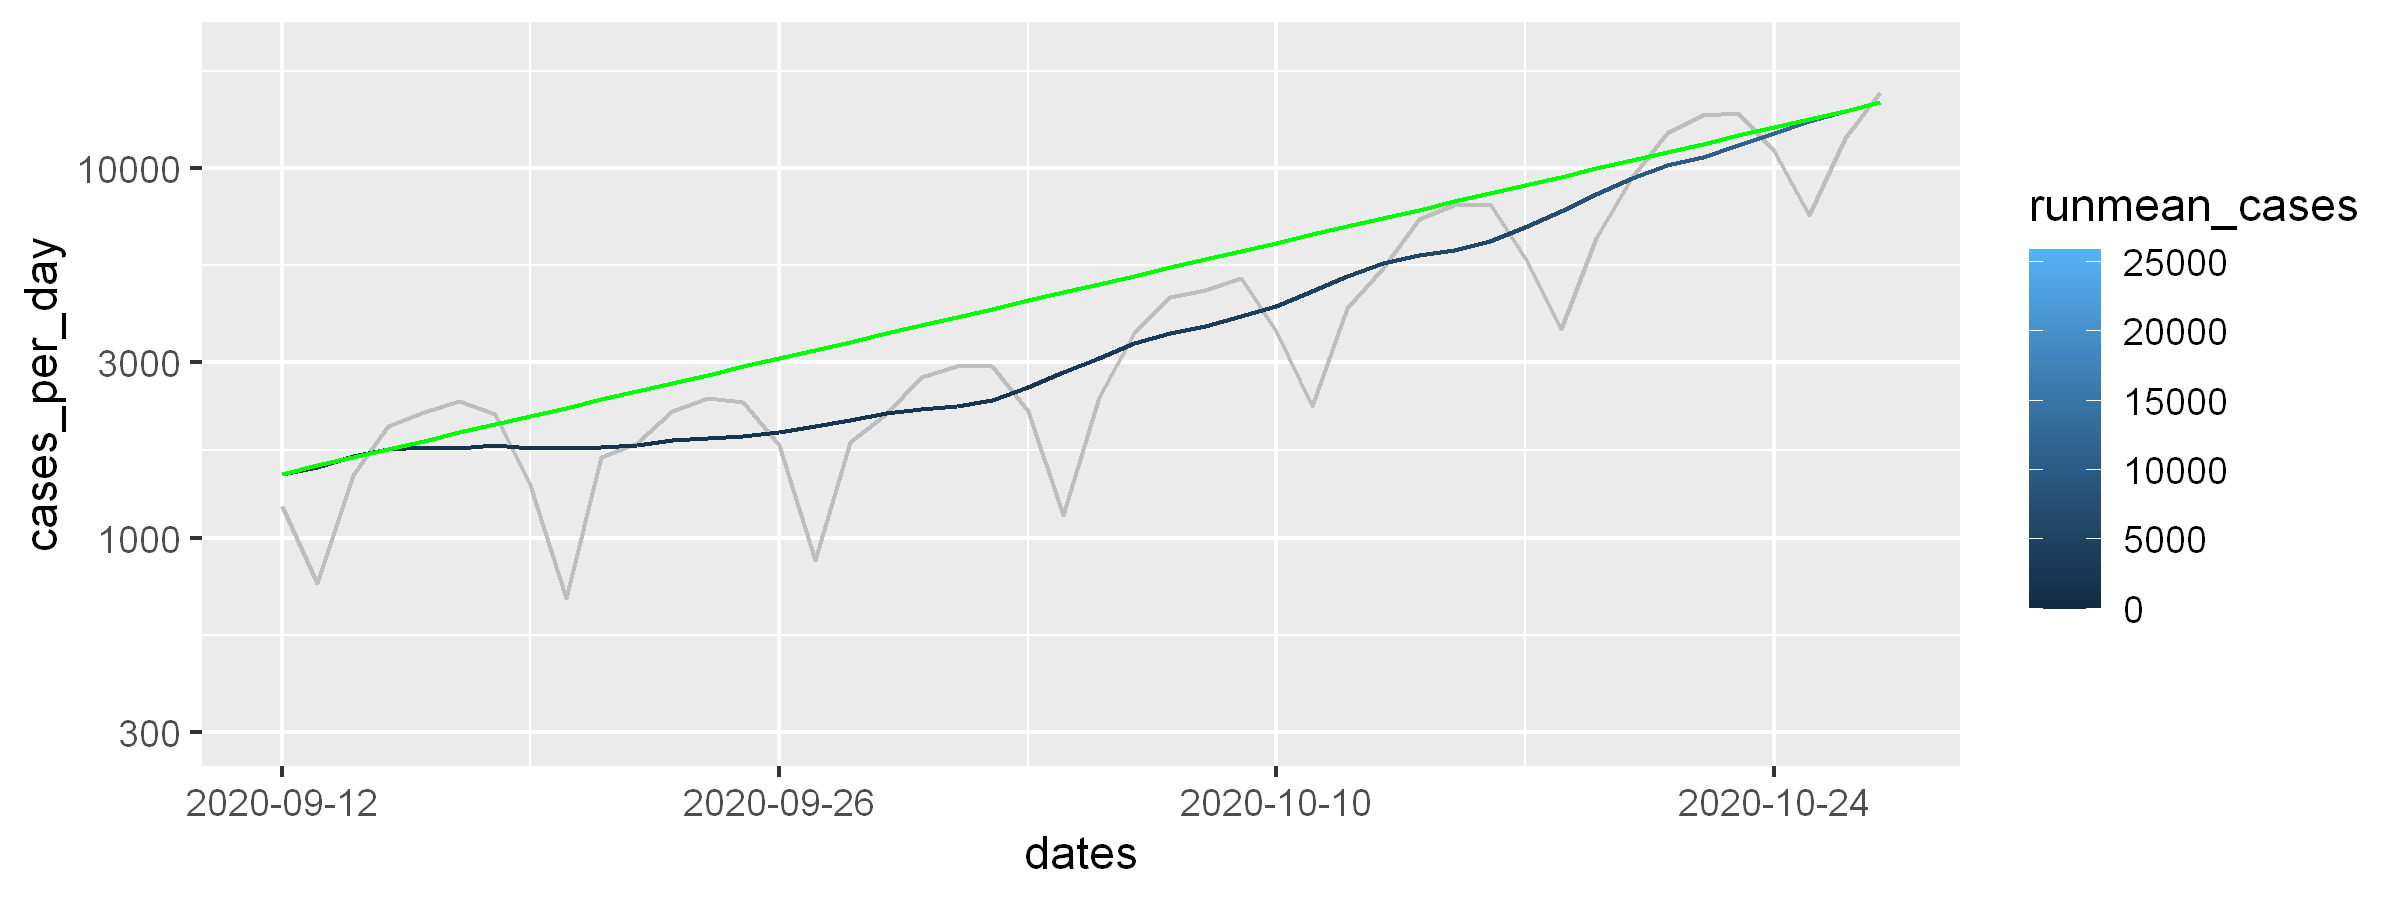

In [97]:
q + geom_path(data=df_line,aes(x=dates,y=line), color="green" )

# Aufgabe
* Versucht anhand der logarithmierten Fallzahlen Zeiträume zu finden, für die exponentielles Wachstum plausibel erscheint.
* Zeichnet die entsprechenden Plots und die geschätzten Wachstumsgeraden

# Neuer Datensatz
Ladet euch die Daten des Portals "Our World in Data" runter:

https://covid.ourworldindata.org/data/owid-covid-data.csv

In [98]:
df_owid <- read.csv("data/owid-covid-data.csv")
head(df_owid)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,2020-02-24,1,1,NA,NA,NA,NA,...,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-25,1,0,NA,NA,NA,NA,...,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-26,1,0,NA,NA,NA,NA,...,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-27,1,0,NA,NA,NA,NA,...,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-28,1,0,NA,NA,NA,NA,...,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-02-29,1,0,0.143,NA,NA,0,...,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511


In [99]:
colnames(df_owid)

[1] "iso_code"                             
 [2] "continent"                            
 [3] "location"                             
 [4] "date"                                 
 [5] "total_cases"                          
 [6] "new_cases"                            
 [7] "new_cases_smoothed"                   
 [8] "total_deaths"                         
 [9] "new_deaths"                           
[10] "new_deaths_smoothed"                  
[11] "total_cases_per_million"              
[12] "new_cases_per_million"                
[13] "new_cases_smoothed_per_million"       
[14] "total_deaths_per_million"             
[15] "new_deaths_per_million"               
[16] "new_deaths_smoothed_per_million"      
[17] "reproduction_rate"                    
[18] "icu_patients"                         
[19] "icu_patients_per_million"             
[20] "hosp_patients"                        
[21] "hosp_patients_per_million"            
[22] "weekly_icu_admissions"                
[23] "weekly_icu_admissions_per_million"    
[24] "weekly_hosp_admissions"               
[25] "weekly_hosp_admissions_per_million"   
[26] "new_tests"                            
[27] "total_tests"                          
[28] "total_tests_per_thousand"             
[29] "new_tests_per_thousand"               
[30] "new_tests_smoothed"                   
[31] "new_tests_smoothed_per_thousand"      
[32] "positive_rate"                        
[33] "tests_per_case"                       
[34] "tests_units"                          
[35] "total_vaccinations"                   
[36] "people_vaccinated"                    
[37] "people_fully_vaccinated"              
[38] "new_vaccinations"                     
[39] "new_vaccinations_smoothed"            
[40] "total_vaccinations_per_hundred"       
[41] "people_vaccinated_per_hundred"        
[42] "people_fully_vaccinated_per_hundred"  
[43] "new_vaccinations_smoothed_per_million"
[44] "stringency_index"                     
[45] "population"                           
[46] "population_density"                   
[47] "median_age"                           
[48] "aged_65_older"                        
[49] "aged_70_older"                        
[50] "gdp_per_capita"                       
[51] "extreme_poverty"                      
[52] "cardiovasc_death_rate"                
[53] "diabetes_prevalence"                  
[54] "female_smokers"                       
[55] "male_smokers"                         
[56] "handwashing_facilities"               
[57] "hospital_beds_per_thousand"           
[58] "life_expectancy"                      
[59] "human_development_index"

Wir beschäftigen uns zunächst wieder mit Deutschland:

In [101]:
df_owid$date <- as.Date(df_owid$date)


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


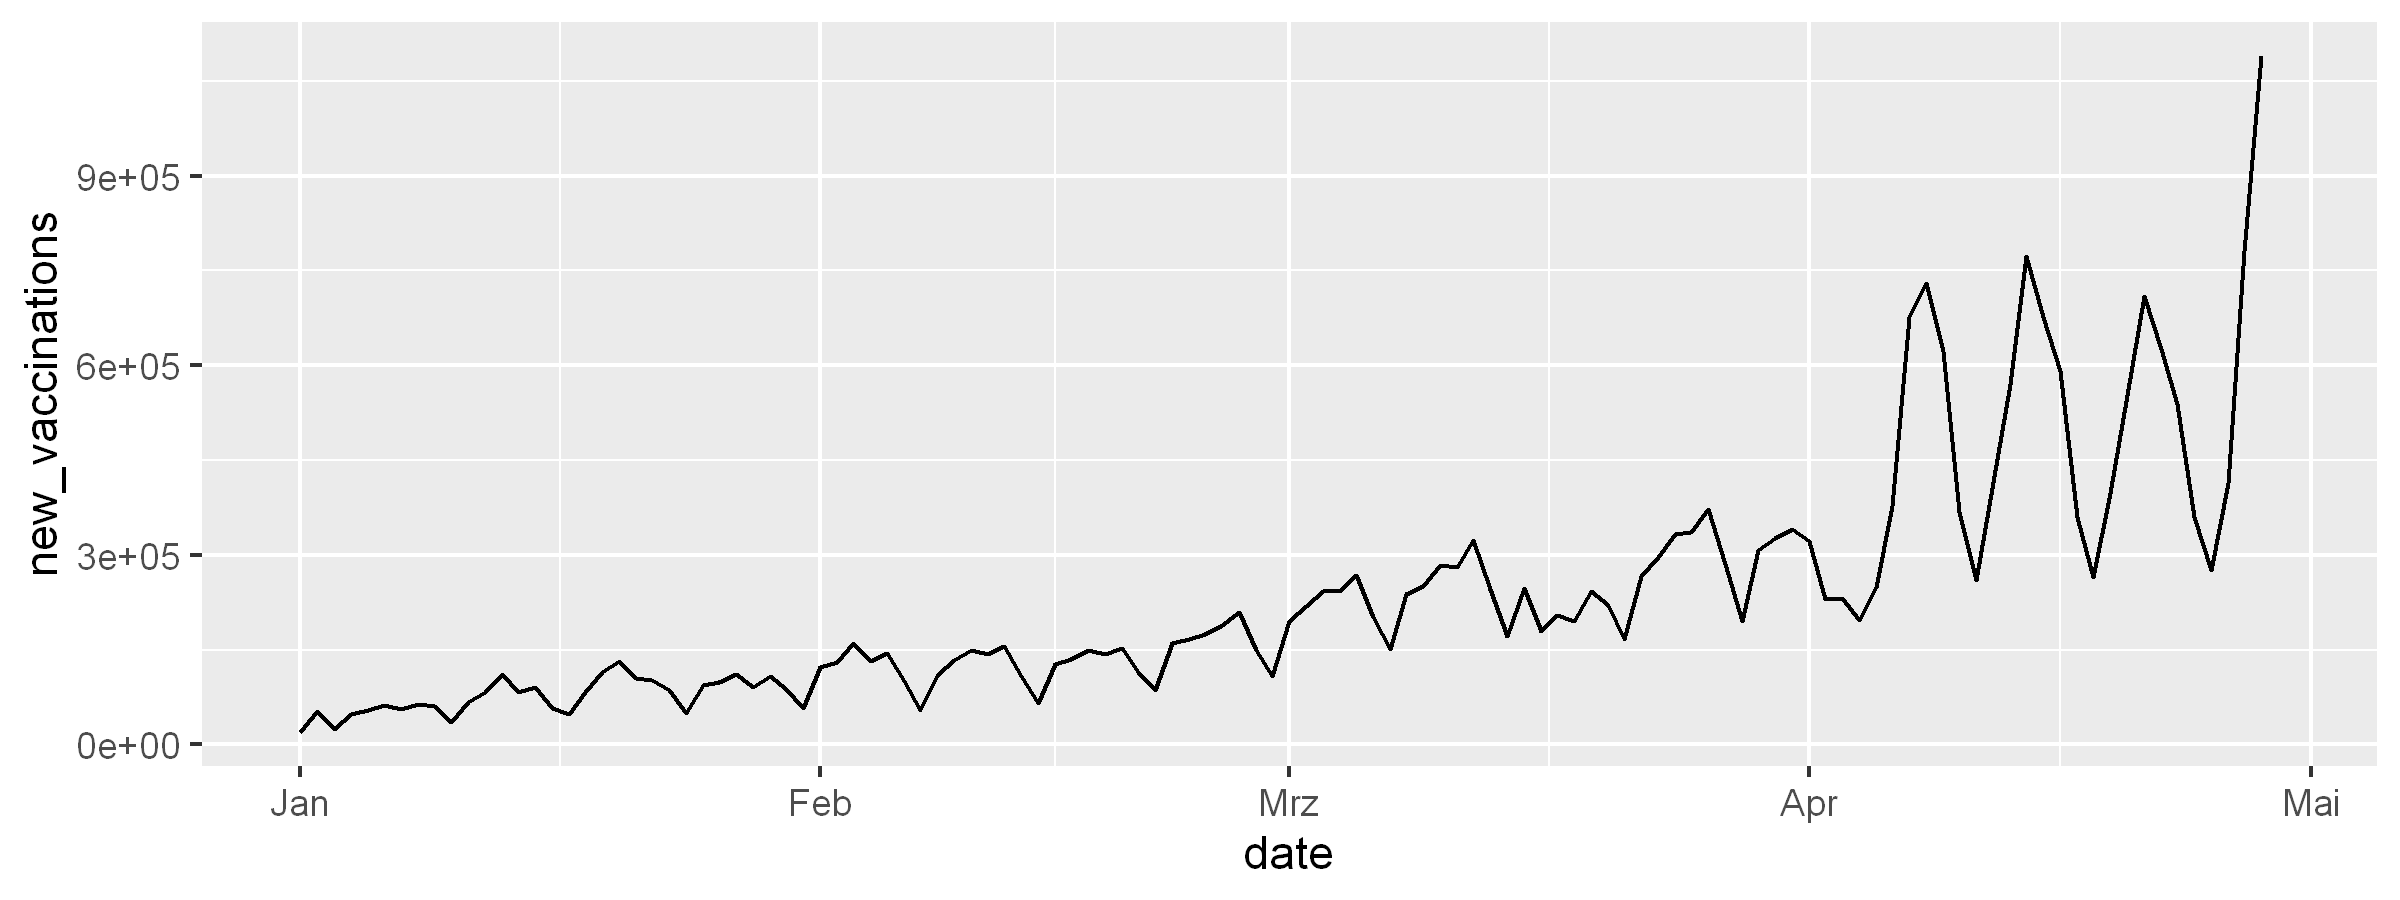

In [121]:
ggplot(df_owid[df_owid$location=="Germany" & df_owid$date>="2021-01-01",]) +
    geom_path(aes(x=date,y=new_vaccinations)) 

Warning message:
"Removed 1934 row(s) containing missing values (geom_path)."


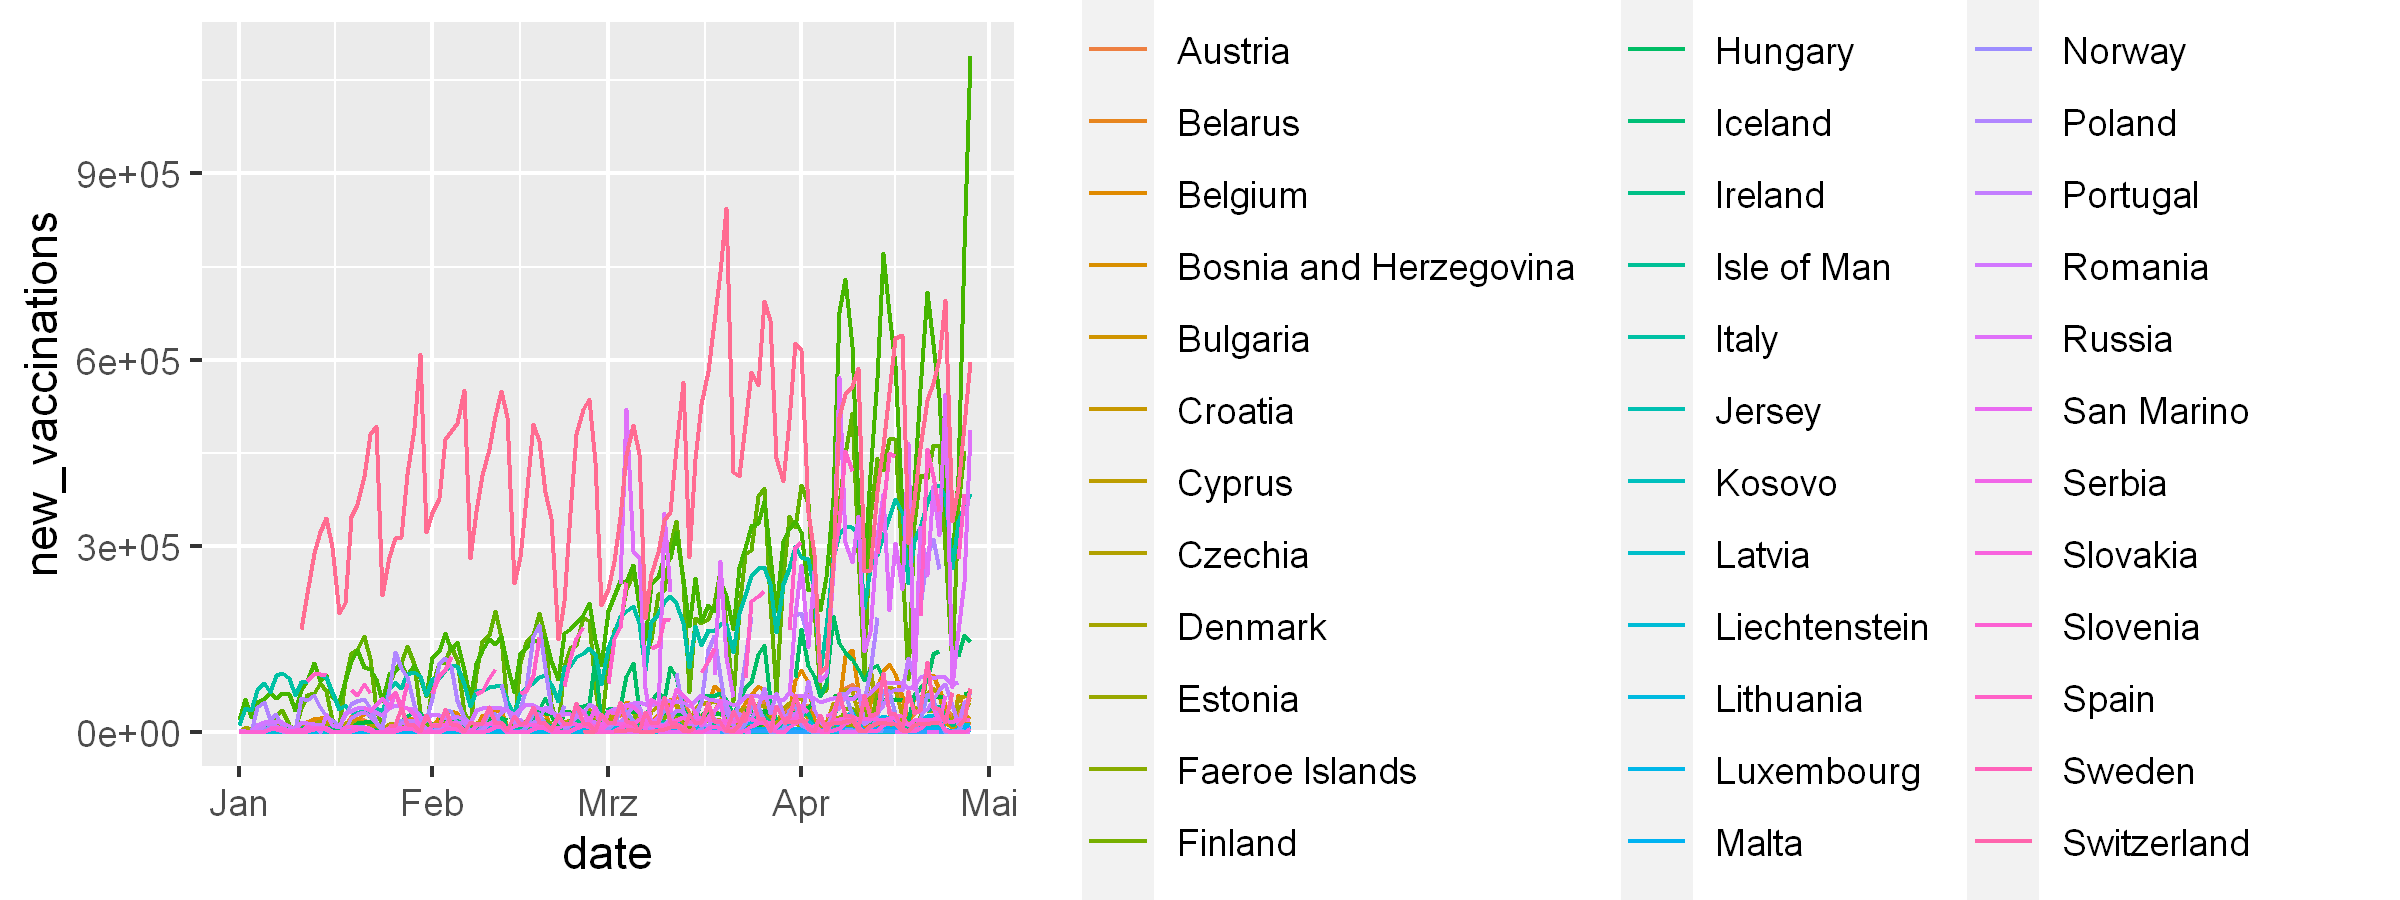

In [122]:
ggplot(df_owid[df_owid$continent =="Europe" & df_owid$date>="2021-01-01",]) +
    geom_path(aes(x=date,y=new_vaccinations, color=location)) 

In [123]:
head(df_owid[df_owid$continent =="Europe" & df_owid$date>="2021-01-01",])

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1185,ALB,Europe,Albania,2021-01-01,58316,0,419.429,1181,0,6.714,...,11803.43,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795
1186,ALB,Europe,Albania,2021-01-02,58991,675,462.286,1190,9,6.714,...,11803.43,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795
1187,ALB,Europe,Albania,2021-01-03,59438,447,454.857,1193,3,5.714,...,11803.43,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795
1188,ALB,Europe,Albania,2021-01-04,59623,185,435.857,1199,6,5.000,...,11803.43,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795
1189,ALB,Europe,Albania,2021-01-05,60283,660,448.143,1210,11,5.714,...,11803.43,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795
1190,ALB,Europe,Albania,2021-01-06,61008,725,468.714,1217,7,6.143,...,11803.43,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795


In [132]:
vacc_germany <- df_owid$new_vaccinations_smoothed_per_million[df_owid$location=="Germany" & df_owid$date>="2021-01-01"]
vacc_france <-  df_owid$new_vaccinations_smoothed_per_million[df_owid$location=="France" & df_owid$date>="2021-01-01"]
correlation_france <- cor(vacc_germany, vacc_france, use="pairwise.complete.obs")
cat(paste0("Vaccination correlation with France is ", correlation_france,"\n"))


Vaccination correlation with France is 0.969660889018272


In [135]:
cat(paste0("Vaccination correlation with France is ", format(correlation_france*100,digits=4),"%\n"))


Vaccination correlation with France is 96.97%


# Aufgabe
* Stellt den Impffortschritt der zehn Länder weltweit mit der aktuell höchsten Impfquote in einem Plot dar. 
* Reproduziert den Plot für die zehn führenden Länder, die mehr als 5 Millionen Einwohner haben.


* Berechnet die Korrelationen der Impfgeschwindigkeit mit Deutschland für alle europäischen Länder.
* Erstellt einen Plot für die Impfungen pro eine Million Einwohner mit den fünf europäischen Ländern, die die höchste Korrelation haben. Färbt die Graphen entsprechend der Korrelation.